# ADAPTIVE ALERTING IN SIEM

### (1) Importing Data:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [2]:
kddcup_names = open("../datastore/kddcup.names").read().split('\n')
features = []
for feature in kddcup_names[1:]:
    features.append(feature.split(':')[0].strip())

features.append("connection_type")
features

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'connection_type']

In [3]:
data = pd.read_csv('../datastore/kddcup.data_10_percent', names=features, index_col=False, header=None)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
print('='*40)
print('Number of data points are:',data.shape[0])
print('='*40)
print('Number of features are:',data.shape[1])
print('='*40)
print('Some of the features are:',features[:10])
print('='*40)

Number of data points are: 494021
Number of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [5]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [6]:
output = data['connection_type'].values
labels = set(output)
print('The different type of output labels are:',labels)
print('='*125)
print('No. of different output labels are:', len(labels))

The different type of output labels are: {'satan.', 'portsweep.', 'warezmaster.', 'land.', 'pod.', 'imap.', 'rootkit.', 'ftp_write.', 'loadmodule.', 'normal.', 'perl.', 'guess_passwd.', 'phf.', 'back.', 'spy.', 'teardrop.', 'ipsweep.', 'nmap.', 'multihop.', 'warezclient.', 'smurf.', 'buffer_overflow.', 'neptune.'}
No. of different output labels are: 23


### (2) Data Cleaning

In [7]:
print('Null values in dataset are',len(data[data.isnull().any(1)]))

Null values in dataset are 0


In [8]:
data.connection_type.head()

0    normal.
1    normal.
2    normal.
3    normal.
4    normal.
Name: connection_type, dtype: object

Observed that there is an extra '.' in the 'connection_type' column after the connection type. For better visualization and interpretation, we remove the '.'.

In [9]:
data['connection_type'] = data['connection_type'].apply(lambda x : str(x)[:-1])
data.connection_type.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: connection_type, dtype: object

Scaling all the numeric features between 0 and 1. Since we are given a detailed description of the data set features denoting which features are continuous and which are discrete along with the data types.

In [10]:
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

(145586, 42)

In [11]:
data.to_pickle('data.pkl')
data = pd.read_pickle('data.pkl')

### (3) Exploratory Data Analysis

Visualization of attack distribution over dataset

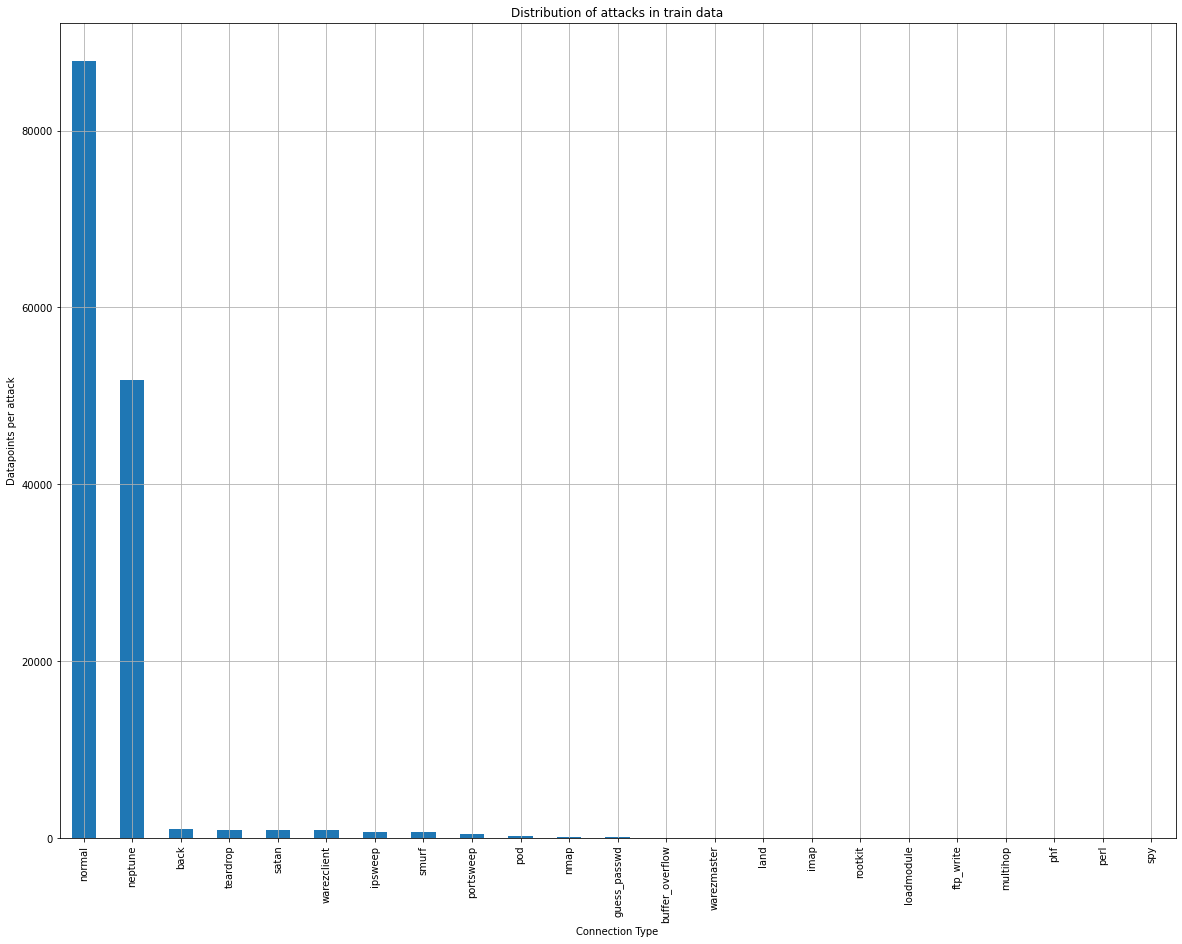

In [12]:
plt.figure(figsize=(20,15))
class_distribution = data['connection_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Connection Type')
plt.ylabel('Datapoints per attack')
plt.title('Distribution of attacks in train data')
plt.grid()
plt.show()

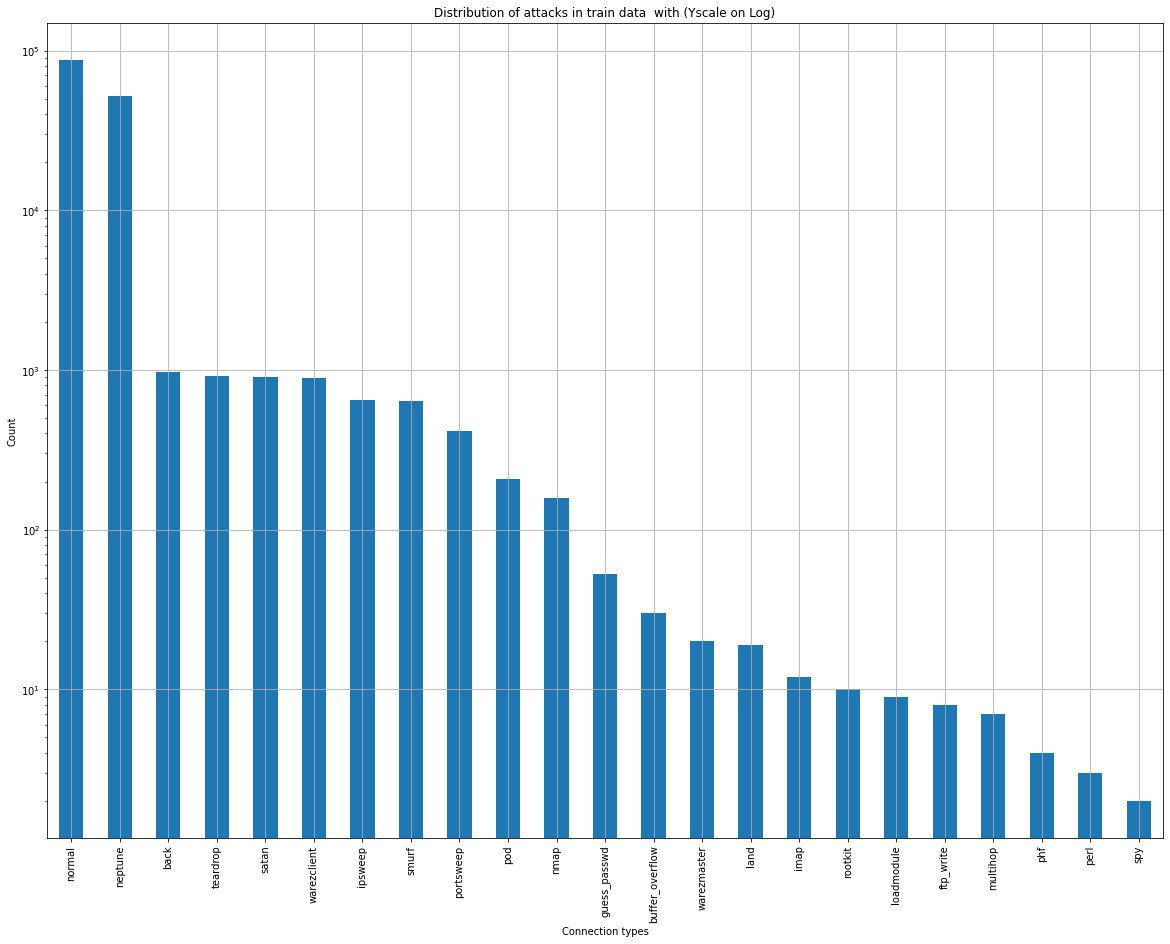

In [13]:
plt.figure(figsize=(20,15))
plt.yscale("log")
data["connection_type"].value_counts().plot(kind="bar")
plt.title('Distribution of attacks in train data  with (Yscale on Log)')
plt.ylabel("Count")
plt.xlabel("Connection types")
plt.grid()
plt.show()

In [14]:
sorted_y = np.argsort(-class_distribution.values)
for i in sorted_y:
    print('Number of data points in class', i+1,':', class_distribution.values[i], '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')

Number of data points in class 1 : 87832 ( 60.33 %)
Number of data points in class 2 : 51820 ( 35.594 %)
Number of data points in class 3 : 968 ( 0.665 %)
Number of data points in class 4 : 918 ( 0.631 %)
Number of data points in class 5 : 906 ( 0.622 %)
Number of data points in class 6 : 893 ( 0.613 %)
Number of data points in class 7 : 651 ( 0.447 %)
Number of data points in class 8 : 641 ( 0.44 %)
Number of data points in class 9 : 416 ( 0.286 %)
Number of data points in class 10 : 206 ( 0.141 %)
Number of data points in class 11 : 158 ( 0.109 %)
Number of data points in class 12 : 53 ( 0.036 %)
Number of data points in class 13 : 30 ( 0.021 %)
Number of data points in class 14 : 20 ( 0.014 %)
Number of data points in class 15 : 19 ( 0.013 %)
Number of data points in class 16 : 12 ( 0.008 %)
Number of data points in class 17 : 10 ( 0.007 %)
Number of data points in class 18 : 9 ( 0.006 %)
Number of data points in class 19 : 8 ( 0.005 %)
Number of data points in class 20 : 7 ( 0.005 

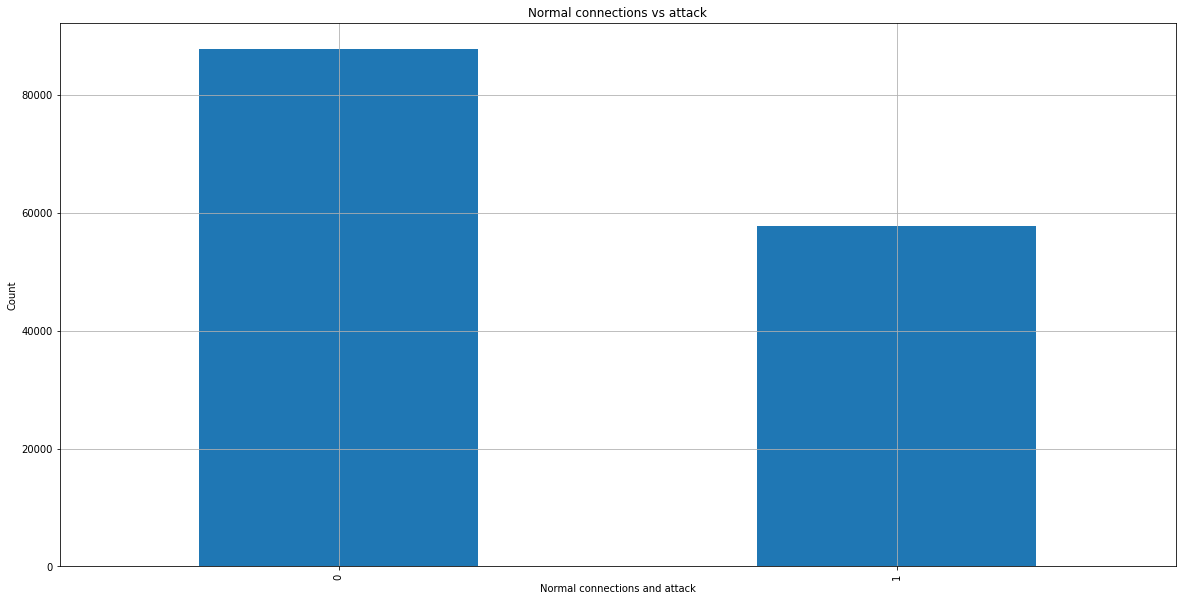

Percentage for  Normal Connection : 87832 ( 60.33 %)
Percentage for  Attack : 57754 ( 39.67 %)


In [15]:
data["label"] = data["connection_type"] != 'normal'
data["label"] = data["label"].apply(lambda x : int(x))
data.label.head()

plt.figure(figsize=(20,10))
plt.title("Normal connections vs attack")
connection_type_distribution = data['label'].value_counts()
connection_type_distribution.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Normal connections and attack")
plt.grid()
plt.show()

sorted_y = np.argsort(-connection_type_distribution.values)
for i in sorted_y:
    print('Percentage for ', "Normal Connection" if i==0 else "Attack",':', connection_type_distribution.values[i], '(', np.round((connection_type_distribution.values[i]/data.shape[0]*100), 3), '%)')

In [16]:
DF_normal = data[data["label"] == 0]
DF_attacked = data[data["label"] == 1]

In [17]:
def plotHists(i, threshold = 0):
    plt.figure(figsize = [10,10])
    plt.subplot(2, 1, 1)
    plt.title('Histogram for '+i+': Normal connections')
    plt.yscale('log')
    plt.hist(DF_normal[DF_normal[i] > threshold][i], bins=300, color='green')
    plt.ylabel("Count")
    plt.xlabel(i+" Values")
    plt.subplot(2, 1, 2)
    plt.title('Histogram for '+i+': Attacked connections')
    plt.yscale('log')
    plt.hist(DF_attacked[DF_attacked[i] > threshold][i], bins = 300, color='red')
    plt.ylabel("Count")
    plt.xlabel(i+" Values")
    plt.show()

In [18]:
data["label"] = data["connection_type"] != 'normal'
data["label"] = data["label"].apply(lambda x : int(x))
data.label.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

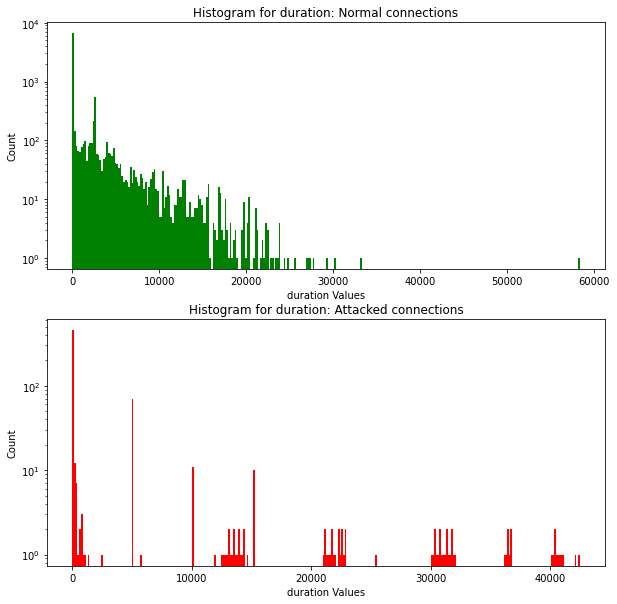

In [19]:
plotHists("duration")

From observation, the duration is concentrated towards smaller values in normal connections. Even though the duration values for attacks are spread over the entire range of values, we can conclude that if a connection's duration is more than 0.5, it might probably be an attack

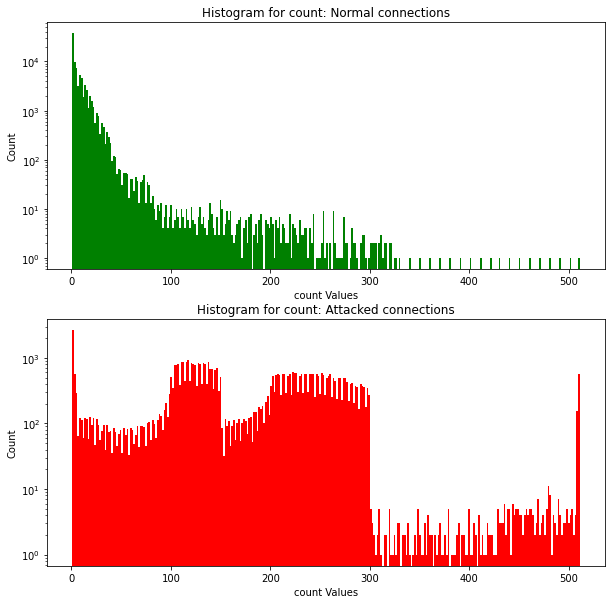

In [20]:
plotHists("count")

Frequency of connections to the same host is concentrated at smaller values for normal connections. However, for attacks, there is a surge between values 0.2 and 0.6 which could denote an attack.

### Univariate Analysis and Bivariate Analysis using pairplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

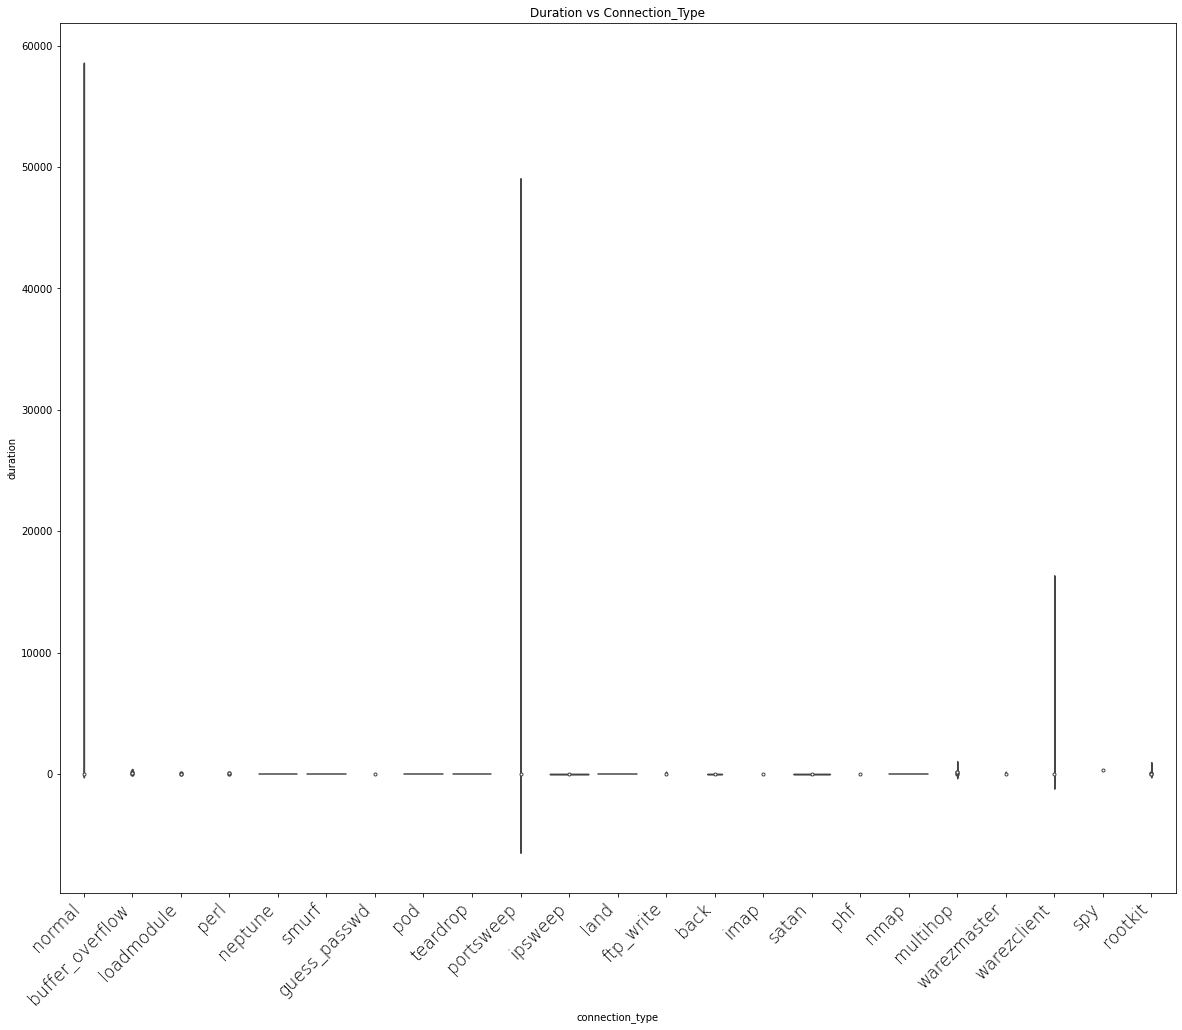

In [21]:
import seaborn as sns
plt.figure(figsize=(20,16))
plt.title('Duration vs Connection_Type')
sns.set(style="whitegrid")
ax = sns.violinplot(x="connection_type", y="duration", data=data, fliersize=None)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [22]:
def pairplot(data, label, features=[]):
    '''
    This function creates pairplot taking 4 features from our dataset as default parameters along with the output variable
    '''
    sns.pairplot(data, hue=label, height=4, diag_kind='hist',   vars=features, plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})

In [23]:
#pairplot(data, "connection_type", features=[ "num_access_files", "num_shells","count" , "num_outbound_cmds"])

In [24]:
#pairplot(data, "connection_type", features=[ "rerror_rate", "serror_rate","srv_count", "srv_serror_rate"])

In [25]:
#pairplot(data, 'connection_type', features=['dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'])

In [26]:
#pairplot(data, 'connection_type', features=['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'])

#### Observation


No linear separability but almost linear separability between the different output categories.


### TSNE for Bivariate Analysis ( t-Distributed Stochastic Neighbor Embedding)

In [27]:
from datetime import datetime
import joblib

data = data.drop('label', axis=1)
df = data.drop(['connection_type','protocol_type', 'service', 'flag'], axis=1)
Y = data['connection_type'].values
X = data.drop('connection_type', axis=1)

In [28]:
Y

array(['normal', 'normal', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [29]:
from sklearn.manifold import TSNE

def tsne_func(data, label, no_components, perplexity_value, n_iter_value):
    '''
    This function applies TSNE on the original dataset with  no_components, perplexity_value, n_iter_value as the TSNE parameters 
    and transforms the original dataset into TSNE transformed feature space with the tsne dataset containing number of features 
    equal to the value specified for no_components and also plots the scatter plot of the transformed data points along with 
    their class label 
    '''
    
    print('TSNE with perplexity={} and no. of iterations={}'.format(perplexity_value, n_iter_value))
    
    tsne = TSNE(n_components=no_components, perplexity=perplexity_value, n_iter=n_iter_value)
    
    tsne_df1 = tsne.fit_transform(data)
    print(tsne_df1.shape)
    tsne_df1 = np.vstack((tsne_df1.T, Y)).T
    tsne_data1 = pd.DataFrame(data=tsne_df1, columns=['feature1', 'feature2', 'Output'])
    sns.FacetGrid(tsne_data1, hue='Output', height=6).map(plt.scatter, 'feature1', 'feature2').add_legend()
    print('Duration:',datetime.now()-start)
    plt.show()


In [30]:
#tsne_func(df, "connection_type", no_components=2, perplexity_value =100, n_iter_value=500)

In [31]:
#tsne_func(df, "connection_type", no_components=2, perplexity_value =50, n_iter_value=1000)

 ### (4) Applying Machine Learning Models:

#### Spliting data into trainining and test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=data['connection_type'],random_state=42, test_size=0.20)

In [33]:
print('Train data')
print(X_train.shape)
print(Y_train.shape)
print('='*20)
print('Test data')
print(X_test.shape)
print(Y_test.shape)

Train data
(116468, 41)
(116468,)
Test data
(29118, 41)
(29118,)


In [34]:
classes = np.unique(Y)
nClasses = len(classes)
print('Total number of classes : ', nClasses)
print('Output classes : ', classes)


classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of classes : ', nClasses)
print('Output classes : ', classes)


classes = np.unique(Y_test)
nClasses = len(classes)
print('Total number of classes : ', nClasses)
print('Output classes : ', classes)

Total number of classes :  23
Output classes :  ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']
Total number of classes :  23
Output classes :  ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']
Total number of classes :  21
Output classes :  ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'phf' 'pod'
 'portsweep' 'rootkit' 'satan' 'smurf' 'teardrop' 'warezclient'
 'warezmaster']


### Vectorizing Categorical features using one-hot encoding:-

Categorical features in our dataset are:- 'protocol_type', 'service', and 'flag

#### Protocol type

In [35]:
protocol = list(X_train['protocol_type'].values)
protocol = list(set(protocol))
print('Protocol types are:', protocol)

Protocol types are: ['tcp', 'udp', 'icmp']


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(vocabulary=protocol, binary=True)
train_protocol = one_hot.fit_transform(X_train['protocol_type'].values)
test_protocol = one_hot.transform(X_test['protocol_type'].values)

In [37]:
print(train_protocol[1].toarray())
train_protocol.shape

[[1 0 0]]


(116468, 3)

#### Service Types

In [38]:
service = list(X_train['service'].values)
service = list(set(service))
print('Service types are:\n', service)

Service types are:
 ['time', 'Z39_50', 'http_443', 'csnet_ns', 'ftp_data', 'efs', 'imap4', 'smtp', 'uucp_path', 'whois', 'domain_u', 'exec', 'netbios_ns', 'urp_i', 'http', 'name', 'X11', 'urh_i', 'ssh', 'hostnames', 'netbios_ssn', 'gopher', 'pm_dump', 'systat', 'link', 'iso_tsap', 'echo', 'netstat', 'sql_net', 'kshell', 'nnsp', 'finger', 'shell', 'bgp', 'pop_3', 'tim_i', 'pop_2', 'ftp', 'courier', 'rje', 'vmnet', 'sunrpc', 'discard', 'remote_job', 'uucp', 'auth', 'netbios_dgm', 'daytime', 'supdup', 'private', 'IRC', 'mtp', 'login', 'printer', 'domain', 'ecr_i', 'red_i', 'ldap', 'ctf', 'eco_i', 'telnet', 'other', 'nntp', 'klogin', 'ntp_u']


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
    
one_hot = CountVectorizer(vocabulary=service, binary=True)
train_service = one_hot.fit_transform(X_train['service'].values)
test_service = one_hot.transform(X_test['service'].values)

In [40]:
print(train_service[100].toarray())

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [41]:
train_service.shape

(116468, 65)

In [42]:
flag = list(X_train['flag'].values)
flag = list(set(flag))
print('flag types are:', flag)

flag types are: ['SF', 'SH', 'S1', 'S0', 'RSTR', 'OTH', 'S3', 'REJ', 'RSTO', 'RSTOS0', 'S2']


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
one_hot = CountVectorizer(binary=True)
one_hot.fit(X_train['flag'].values)
train_flag = one_hot.transform(X_train['flag'].values)
test_flag = one_hot.transform(X_test['flag'].values)

In [44]:
print(test_flag[3000].toarray())
train_flag.shape

[[0 0 0 0 0 0 0 0 0 1 0]]


(116468, 11)

In [45]:
X_train.drop(['protocol_type','service','flag'], axis=1, inplace=True)
X_test.drop(['protocol_type','service','flag'], axis=1, inplace=True)

/root/Projects/Python/AdaptiveSIEMAlerting/venv/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
def feature_scaling(X_train, X_test, feature_name):
    
    '''
    This function performs standardisation on the features
    '''
    
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler1 = scaler.fit_transform(X_train[feature_name].values.reshape(-1,1))
    scaler2 = scaler.transform(X_test[feature_name].values.reshape(-1,1))
    
    return scaler1, scaler2

In [47]:
def one_hot_code(X_train, X_test):
    #### duration
    duration1, duration2 = feature_scaling(X_train, X_test, 'duration')
    print("Duration:",duration1[1])
    #### src_bytes
    src_bytes1, src_bytes2 = feature_scaling(X_train, X_test, 'src_bytes')
    print("Source Bytes:", src_bytes1[1])
    #### dst_bytes
    dst_bytes1, dst_bytes2 = feature_scaling(X_train, X_test, 'dst_bytes')
    print("Destination Bytes:", src_bytes1[1])
    #### wrong_fragment
    wrong_fragment1, wrong_fragment2 = feature_scaling(X_train, X_test, 'wrong_fragment')
    print("Wrong Fragment:", wrong_fragment1[1])
    #### urgent 
    urgent1, urgent2 = feature_scaling(X_train, X_test, 'urgent')
    print("Urgent:", urgent1[1])
    
    hot1, hot2 = feature_scaling(X_train, X_test, 'hot')
    
    print(hot1[1])
    
    #####num_failed_logins#####
    
    num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
    
    print(num_failed_logins1[1])
    
    #####num_compromised :-#####
    
    num_compromised1, num_compromised2 = feature_scaling(X_train, X_test, 'num_compromised')
    
    num_compromised1[1]
    
    #####root_shell :-#####
    
    root_shell1, root_shell2 = feature_scaling(X_train, X_test, 'root_shell')
    
    root_shell1[1]
    
    #####su_attempted :-#####
    
    su_attempted1, su_attempted2 = feature_scaling(X_train, X_test, 'su_attempted')
    
    su_attempted1[1]
    
    #####num_root:-#####
    
    num_root1, num_root2 = feature_scaling(X_train, X_test, 'num_root')
    
    num_root1[1]
    
    #####num_file_creations:-#####
    
    num_file_creations1, num_file_creations2 = feature_scaling(X_train, X_test, 'num_file_creations')
    
    num_file_creations1[1]
    
    #####num_shells:-#####
    
    num_shells1, num_shells2 = feature_scaling(X_train, X_test, 'num_shells')
    
    num_shells1[1]
    
    #####num_access_files:-#####
    
    num_access_files1, num_access_files2 = feature_scaling(X_train, X_test, 'num_access_files')
    
    num_access_files1[1]
    
    #####num_outbound_cmds:-#####
    
    data['num_outbound_cmds'].value_counts()
    
    #####- We will not use 'num_outbound_cmds' feature as it has all zero values.#####
    
    #####srv_count:-#####
    
    srv_count1, srv_count2 = feature_scaling(X_train, X_test, 'srv_count')
    
    srv_count1[1]
    
    #####serror_rate:-#####
    
    serror_rate1, serror_rate2 = feature_scaling(X_train, X_test, 'serror_rate')
    
    serror_rate1[1]
    
    #####srv_serror_rate:-#####
    
    srv_serror_rate1, srv_serror_rate2 = feature_scaling(X_train, X_test, 'srv_serror_rate')
    
    srv_serror_rate1[1]
    
    #####rerror_rate:-#####
    
    rerror_rate1, rerror_rate2 = feature_scaling(X_train, X_test, 'rerror_rate')
    
    rerror_rate1[1]
    
    #####srv_rerror_rate :-#####
    
    srv_rerror_rate1, srv_rerror_rate2 = feature_scaling(X_train, X_test, 'srv_rerror_rate')
    
    srv_rerror_rate1[1]
    
    #####same_srv_rate:-#####
    
    same_srv_rate1, same_srv_rate2 = feature_scaling(X_train, X_test, 'same_srv_rate')
    
    same_srv_rate1[1]
    
    #####diff_srv_rate:-#####
    
    diff_srv_rate1, diff_srv_rate2 = feature_scaling(X_train, X_test, 'diff_srv_rate')
    
    diff_srv_rate1[1]
    
    #####srv_diff_host_rate:-#####
    
    srv_diff_host_rate1, srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'srv_diff_host_rate')
    
    srv_diff_host_rate1[1]
    
    #####dst_host_count:-#####
    
    dst_host_count1, dst_host_count2 = feature_scaling(X_train, X_test, 'dst_host_count')
    
    dst_host_count1[1]
    
    #####dst_host_srv_count:-#####
    
    dst_host_srv_count1, dst_host_srv_count2 = feature_scaling(X_train, X_test, 'dst_host_srv_count')
    
    dst_host_srv_count1[1]
    
    #####dst_host_same_srv_rate:-#####
    
    dst_host_same_srv_rate1, dst_host_same_srv_rate2= feature_scaling(X_train, X_test, 'dst_host_same_srv_rate')
    
    dst_host_same_srv_rate1[1]
    
    #####dst_host_diff_srv_rate:-#####
    
    dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')
    
    dst_host_diff_srv_rate1[1]
    
    #####dst_host_same_src_port_rate:-#####
    
    dst_host_same_src_port_rate1, dst_host_same_src_port_rate2 = feature_scaling(X_train, X_test, 'dst_host_same_src_port_rate')
    
    dst_host_same_src_port_rate1[1]
    
    #####dst_host_srv_diff_host_rate:-#####
    
    dst_host_srv_diff_host_rate1, dst_host_srv_diff_host_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_diff_host_rate')
    
    dst_host_srv_diff_host_rate1[1]
    
    #####dst_host_serror_rate:-#####
    
    dst_host_serror_rate1, dst_host_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_serror_rate')
    
    dst_host_serror_rate1[1]
    
    #####dst_host_srv_serror_rate:-#####
    
    dst_host_srv_serror_rate1, dst_host_srv_serror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_serror_rate')
    
    dst_host_srv_serror_rate1[1]
    
    #####dst_host_rerror_rate:-#####
    
    dst_host_rerror_rate1, dst_host_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_rerror_rate')
    
    dst_host_rerror_rate1[1]
    
    #####dst_host_srv_rerror_rate:-#####
    
    dst_host_srv_rerror_rate1, dst_host_srv_rerror_rate2 = feature_scaling(X_train, X_test, 'dst_host_srv_rerror_rate')
    
    dst_host_srv_rerror_rate1[1]
    
    #####num_failed_logins :-#####
    
    num_failed_logins1, num_failed_logins2 = feature_scaling(X_train, X_test, 'num_failed_logins')
    
    num_failed_logins1[1]
    
    #####land:-#####
    
    land1, land2 = np.array([X_train['land'].values]), np.array([X_test['land'].values])
    
    land1.shape
    
    #####is_host_login :-#####
    
    is_host_login1, is_host_login2 = np.array([X_train['is_host_login'].values]), np.array([X_test['is_host_login'].values])
    
    is_host_login1.shape
    
    #####is_guest_login :-#####
    
    is_guest_login1, is_guest_login2 = np.array([X_train['is_guest_login'].values]), np.array([X_test['is_guest_login'].values])
    
    is_guest_login1.shape
    
    #####logged_in :-#####
    
    logged_in1, logged_in2 = np.array([X_train['logged_in'].values]), np.array([X_test['logged_in'].values])
    
    logged_in1.shape
    
    #####count:-#####
    
    count1, count2 = feature_scaling(X_train, X_test, 'count')
    
    count1[1]
    
    #####dst_host_diff_srv_rate:-#####
    
    dst_host_diff_srv_rate1, dst_host_diff_srv_rate2 = feature_scaling(X_train, X_test, 'dst_host_diff_srv_rate')
    
    dst_host_diff_srv_rate1[1]

    X_train_1 = hstack((duration1, train_protocol, train_service, train_flag, src_bytes1,
    dst_bytes1, land1.T, wrong_fragment1, urgent1, hot1,
    num_failed_logins1, logged_in1.T, num_compromised1, root_shell1,
    su_attempted1, num_root1, num_file_creations1, num_shells1,
    num_access_files1, is_host_login1.T,
    is_guest_login1.T, count1, srv_count1, serror_rate1,
    srv_serror_rate1, rerror_rate1, srv_rerror_rate1, same_srv_rate1,
    diff_srv_rate1, srv_diff_host_rate1, dst_host_count1,
    dst_host_srv_count1, dst_host_same_srv_rate1,
    dst_host_diff_srv_rate1, dst_host_same_src_port_rate1,
    dst_host_srv_diff_host_rate1, dst_host_serror_rate1,
    dst_host_srv_serror_rate1, dst_host_rerror_rate1,
    dst_host_srv_rerror_rate1))

    X_test_1 = hstack((duration2, test_protocol, test_service, test_flag, src_bytes2,
    dst_bytes2, land2.T, wrong_fragment2, urgent2, hot2,
    num_failed_logins2, logged_in2.T, num_compromised2, root_shell2,
    su_attempted2, num_root2, num_file_creations2, num_shells2,
    num_access_files2, is_host_login2.T,
    is_guest_login2.T, count2, srv_count2, serror_rate2,
    srv_serror_rate2, rerror_rate2, srv_rerror_rate2, same_srv_rate2,
    diff_srv_rate2, srv_diff_host_rate2, dst_host_count2,
    dst_host_srv_count2, dst_host_same_srv_rate2,
    dst_host_diff_srv_rate2, dst_host_same_src_port_rate2,
    dst_host_srv_diff_host_rate2, dst_host_serror_rate2,
    dst_host_srv_serror_rate2, dst_host_rerror_rate2,
    dst_host_srv_rerror_rate2))
    
    return X_train_1, X_test_1


In [48]:
X_train_1, X_test_1 = one_hot_code(X_train, X_test)

Duration: [-0.1085034]
Source Bytes: [-0.02854002]
Destination Bytes: [-0.02854002]
Wrong Fragment: [-0.08434863]
Urgent: [-0.00441748]
[-0.07047057]
[-0.01758389]


In [49]:
X_test_1.shape

import joblib
joblib.dump(X_train_1,'X_train_1.pkl')
joblib.dump(X_test_1,'X_test_1.pkl')
X_train_1 = joblib.load('X_train_1.pkl')
X_test_1 = joblib.load('X_test_1.pkl')

joblib.dump(Y_train,'Y_train.pkl')
joblib.dump(Y_test,'Y_test.pkl')
Y_train = joblib.load('Y_train.pkl')
Y_test = joblib.load('Y_test.pkl')

In [50]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
def confusion_matrix_func(Y_test, y_test_pred):
    '''
    This function plots the confusion matrix heatmap using the actual and predicted values.
    '''
    C = confusion_matrix(Y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['nmap', 'portsweep', 'phf', 'satan', 'warezmaster', 'buffer_overflow', 'teardrop', 'back', 'ftp_write',
              'smurf', 'imap', 'land', 'multihop', 'spy', 'ipsweep', 'normal', 'loadmodule', 'pod', 'perl', 'rootkit',
              'neptune', 'guess_passwd', 'warezclient']
  
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

In [52]:
def model(model_name, X_train, Y_train, X_test, Y_test):
    
    '''
    This function computes the performance scores on the train and test data.
    '''
    
    print('Fitting the model and prediction on train data:')
    start = dt.datetime.now()
    model_name.fit(X_train, Y_train)
    y_tr_pred = model_name.predict(X_train)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    results_tr = dict()
    y_tr_pred = model_name.predict(X_train)    
    results_tr['precision'] = precision_score(Y_train, y_tr_pred, average='weighted')
    results_tr['recall'] = recall_score(Y_train, y_tr_pred, average='weighted')
    results_tr['f1_score'] = f1_score(Y_train, y_tr_pred, average='weighted')
    
    results_test = dict()
    print('Prediction on test data:')
    start = dt.datetime.now()
    y_test_pred = model_name.predict(X_test)
    print('Completed')
    print('Time taken:',dt.datetime.now()-start)
    print('='*50)
    
    print('Performance metrics:')
    print('='*50)
    print('Confusion Matrix is:')
    confusion_matrix_func(Y_test, y_test_pred)
    print('='*50)
    results_test['precision'] = precision_score(Y_test, y_test_pred, average='weighted')
    print('Precision score is:')
    print(precision_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['recall'] = recall_score(Y_test, y_test_pred, average='weighted')
    print('Recall score is:')
    print(recall_score(Y_test, y_test_pred, average='weighted'))
    print('='*50)
    results_test['f1_score'] = f1_score(Y_test, y_test_pred, average='weighted')
    print('F1-score is:')
    print(f1_score(Y_test, y_test_pred, average='weighted'))
    # add the trained  model to the results
    results_test['model'] = model
    
    return results_tr, results_test

In [53]:
hyperparameter = {'var_smoothing':[10**x for x in range(-9,3)]}

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_grid = GridSearchCV(nb, param_grid=hyperparameter, cv=5, verbose=1, n_jobs=-1)

Fitting the model and prediction on train data:
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/root/Projects/Python/AdaptiveSIEMAlerting/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   29.0s finished


Completed
Time taken: 0:00:32.219717


/root/Projects/Python/AdaptiveSIEMAlerting/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction on test data:
Completed
Time taken: 0:00:00.517281
Performance metrics:
Confusion Matrix is:


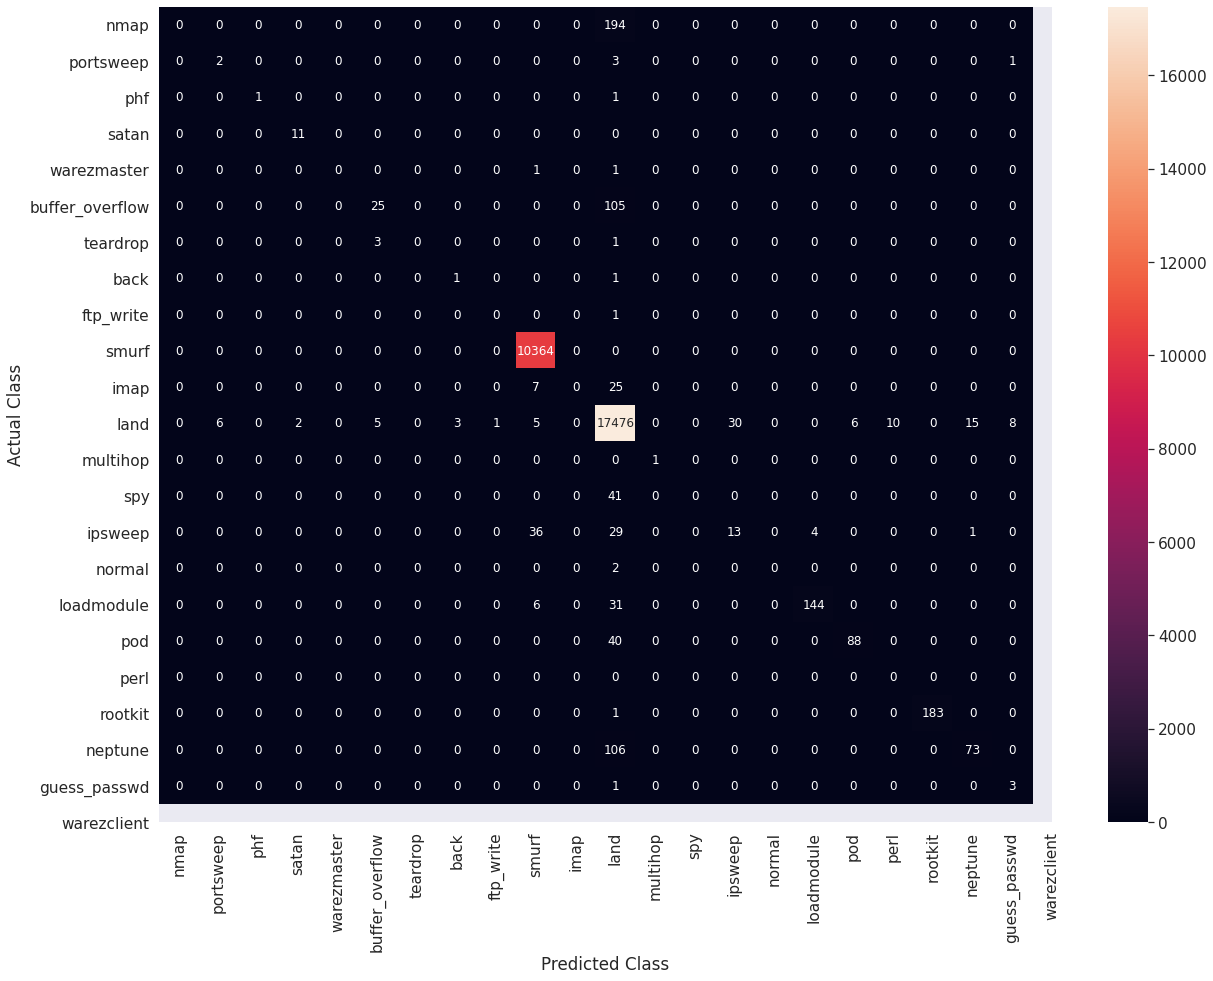

Precision score is:


/root/Projects/Python/AdaptiveSIEMAlerting/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9641739573656688


/root/Projects/Python/AdaptiveSIEMAlerting/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score is:
0.9748265677587746
F1-score is:
0.9679738823337318


In [54]:
nb_grid_results_tr, nb_grid_results_test = model(nb_grid, X_train_1.toarray(), Y_train, X_test_1.toarray(), Y_test)

In [55]:
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

def label_encoder(Y):
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    y = to_categorical(encoded_Y)
    return y


Y= label_encoder(Y)

In [56]:
Y.shape

(145586, 23)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=42, test_size=0.20)

In [58]:
X_train, X_test = one_hot_code(X_train, X_test)

Duration: [-0.1083763]
Source Bytes: [-0.0044031]
Destination Bytes: [-0.0044031]
Wrong Fragment: [-0.0840174]
Urgent: [-0.00529609]
[-0.07062339]
[-0.01781725]


In [59]:
X_test=np.array(X_test.todense())

In [60]:
X_test.shape

(29118, 116)

In [61]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [62]:
X_test.shape

(29118, 116, 1)

In [63]:
X_train=np.array(X_train.todense())

In [64]:
X_train.shape

(116468, 116)

In [65]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [66]:
X_train.shape

(116468, 116, 1)

In [67]:
Y_train.shape

(116468, 23)

In [68]:
Y_test.shape

(29118, 23)

In [69]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from numpy import mean
from numpy import std

In [70]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    print("Features", n_features)
    print("Steps", n_timesteps)
    print("Outputs", n_outputs)
    # 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # model save
    model.save("nid_siem_model.h5")
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

In [71]:
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [72]:
# run an experiment
def run_experiment(repeats=5):
    # load data
    trainX, trainy, testX, testy = X_train, Y_train, X_test, Y_test
    print(trainX.shape, trainX.shape, trainy.shape)
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy)
        score = score * 100.0
        print('>#%d: %.3f' % (r + 1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)


# run the experiment
run_experiment()


(116468, 116, 1) (116468, 116, 1) (116468, 23)
Features 1
Steps 116
Outputs 23
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 114, 64)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 112, 64)           12352     
_________________________________________________________________
dropout (Dropout)            (None, 112, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 56, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3584)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               358500    
___________________________________________

In [73]:
data = pd.read_csv('../datastore/kddcup.data_demo.csv', nrows=40000)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [83]:
def feature_scaling(X, feature_name):
    
    '''
    This function performs standardisation on the features
    '''
    
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler = scaler.fit_transform(X[feature_name].values.reshape(-1,1))
    # scaler = scaler.transform(X[feature_name].values.reshape(-1,1))
    
    return scaler

In [86]:


def one_hot_code(X):
    #### duration
    duration = feature_scaling(X, 'duration')
    print("Duration:", duration[1])
    #### src_bytes
    src_bytes = feature_scaling(X, 'src_bytes')
    print("Source Bytes:", src_bytes[1])
    #### dst_bytes
    dst_bytes = feature_scaling(X, 'dst_bytes')
    print("Destination Bytes:", src_bytes[1])
    #### wrong_fragment
    wrong_fragment = feature_scaling(X, 'wrong_fragment')
    print("Wrong Fragment:", wrong_fragment[1])
    #### urgent
    urgent = feature_scaling(X, 'urgent')
    print("Urgent:", urgent[1])

    hot = feature_scaling(X, 'hot')

    print(hot[1])

    #####num_failed_logins#####

    num_failed_logins = feature_scaling(X, 'num_failed_logins')

    print(num_failed_logins[1])

    #####num_compromised :-#####

    num_compromised = feature_scaling(X, 'num_compromised')

    num_compromised[1]

    #####root_shell :-#####

    root_shell = feature_scaling(X, 'root_shell')

    root_shell[1]

    #####su_attempted :-#####

    su_attempted = feature_scaling(X, 'su_attempted')

    su_attempted[1]

    #####num_root:-#####

    num_root = feature_scaling(X, 'num_root')

    num_root[1]

    #####num_file_creations:-#####

    num_file_creations = feature_scaling(X, 'num_file_creations')

    num_file_creations[1]

    #####num_shells:-#####

    num_shells = feature_scaling(X, 'num_shells')

    num_shells[1]

    #####num_access_files:-#####

    num_access_files = feature_scaling(X, 'num_access_files')

    num_access_files[1]

    #####num_outbound_cmds:-#####

    data['num_outbound_cmds'].value_counts()

    #####- We will not use 'num_outbound_cmds' feature as it has all zero values.#####

    #####srv_count:-#####

    srv_count = feature_scaling(X, 'srv_count')

    srv_count[1]

    #####serror_rate:-#####

    serror_rate = feature_scaling(X, 'serror_rate')

    serror_rate[1]

    #####srv_serror_rate:-#####

    srv_serror_rate = feature_scaling(X, 'srv_serror_rate')

    srv_serror_rate[1]

    #####rerror_rate:-#####

    rerror_rate = feature_scaling(X, 'rerror_rate')

    rerror_rate[1]

    #####srv_rerror_rate :-#####

    srv_rerror_rate = feature_scaling(X, 'srv_rerror_rate')

    srv_rerror_rate[1]

    #####same_srv_rate:-#####

    same_srv_rate = feature_scaling(X, 'same_srv_rate')

    same_srv_rate[1]

    #####diff_srv_rate:-#####

    diff_srv_rate = feature_scaling(X, 'diff_srv_rate')

    diff_srv_rate[1]

    #####srv_diff_host_rate:-#####

    srv_diff_host_rate = feature_scaling(X, 'srv_diff_host_rate')

    srv_diff_host_rate[1]

    #####dst_host_count:-#####

    dst_host_count = feature_scaling(X, 'dst_host_count')

    dst_host_count[1]

    #####dst_host_srv_count:-#####

    dst_host_srv_count = feature_scaling(X, 'dst_host_srv_count')

    dst_host_srv_count[1]

    #####dst_host_same_srv_rate:-#####

    dst_host_same_srv_rate = feature_scaling(X, 'dst_host_same_srv_rate')

    dst_host_same_srv_rate[1]

    #####dst_host_diff_srv_rate:-#####

    dst_host_diff_srv_rate = feature_scaling(X, 'dst_host_diff_srv_rate')

    dst_host_diff_srv_rate[1]

    #####dst_host_same_src_port_rate:-#####

    dst_host_same_src_port_rate = feature_scaling(X, 'dst_host_same_src_port_rate')

    dst_host_same_src_port_rate[1]

    #####dst_host_srv_diff_host_rate:-#####

    dst_host_srv_diff_host_rate = feature_scaling(X, 'dst_host_srv_diff_host_rate')

    dst_host_srv_diff_host_rate[1]

    #####dst_host_serror_rate:-#####

    dst_host_serror_rate = feature_scaling(X, 'dst_host_serror_rate')

    dst_host_serror_rate[1]

    #####dst_host_srv_serror_rate:-#####

    dst_host_srv_serror_rate = feature_scaling(X, 'dst_host_srv_serror_rate')

    dst_host_srv_serror_rate[1]

    #####dst_host_rerror_rate:-#####

    dst_host_rerror_rate = feature_scaling(X, 'dst_host_rerror_rate')

    dst_host_rerror_rate[1]

    #####dst_host_srv_rerror_rate:-#####

    dst_host_srv_rerror_rate = feature_scaling(X, 'dst_host_srv_rerror_rate')

    dst_host_srv_rerror_rate[1]

    #####num_failed_logins :-#####
    num_failed_logins = feature_scaling(X, 'num_failed_logins')
    num_failed_logins[1]
    #####land:-#####
    land = np.array([X['land'].values])
    #####is_host_login :-#####
    is_host_login = np.array([X['is_host_login'].values])
    #####is_guest_login :-#####
    is_guest_login = np.array([X['is_guest_login'].values])
    #####logged_in :-#####
    logged_in = np.array([X['logged_in'].values])
    #####count:-#####
    count = feature_scaling(X, 'count')
    count[1]
    #####dst_host_diff_srv_rate:-#####
    dst_host_diff_srv_rate = feature_scaling(X, 'dst_host_diff_srv_rate')
    #### protocol ###
    protocol = list(X['protocol_type'].values)
    protocol = list(set(protocol))
    one_hot = CountVectorizer(vocabulary=protocol, binary=True)
    protocol = one_hot.transform(X['protocol_type'].values)
    ##### services ######
    service = list(X['service'].values)
    service = list(set(service))
    one_hot = CountVectorizer(vocabulary=service, binary=True)
    service = one_hot.transform(X['service'].values)
    ######flag #######
    flag = list(X['flag'].values)
    flag = list(set(flag))
    one_hot = CountVectorizer(binary=True)
    one_hot.fit(X['flag'].values)

    flag = one_hot.transform(X['flag'].values)


    X = hstack((duration, protocol, service, flag, src_bytes,
                        dst_bytes, land.T, wrong_fragment, urgent, hot,
                        num_failed_logins, logged_in.T, num_compromised, root_shell,
                        su_attempted, num_root, num_file_creations, num_shells,
                        num_access_files, is_host_login.T,
                        is_guest_login.T, count, srv_count, serror_rate,
                        srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate,
                        diff_srv_rate, srv_diff_host_rate, dst_host_count,
                        dst_host_srv_count, dst_host_same_srv_rate,
                        dst_host_diff_srv_rate, dst_host_same_src_port_rate,
                        dst_host_srv_diff_host_rate, dst_host_serror_rate,
                        dst_host_srv_serror_rate, dst_host_rerror_rate,
                        dst_host_srv_rerror_rate))

    return X


In [87]:
 X = one_hot_code(data)

Duration: [-0.04147663]
Source Bytes: [-0.50506426]
Destination Bytes: [-0.50506426]
Wrong Fragment: [0.]
Urgent: [0.]
[-0.0273964]
[0.]


In [88]:
X.shape

(4000, 48)

In [89]:
X=np.array(X.todense())

X = X.reshape(X.shape[0], X.shape[1], 1)

In [91]:
X.shape

(4000, 48, 1)